In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [3]:
os.chdir('data/AB_Ptax')

In [4]:
def df_from_excelFiles(file_name, sheetname):
    file = pd.ExcelFile(file_name)
    return file.parse(sheetname, header=1,skiprows=[2])

In [5]:
files = os.listdir()

In [6]:
excel_files = [file for file in files if 'xlsx' in file]

In [7]:
ab_res_ptax09_21 = pd.concat([df_from_excelFiles(xl, 'MR(1)-Residential') for xl in excel_files])

In [8]:
ab_res_ptax09_21.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Municipal Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2009.0,City,3.0,AIRDRIE,3.5528,1.7581,1.7581,NaN,0.0332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,City,43.0,BROOKS,6.1139,2.6111,2.6111,NaN,0.1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ab_res_ptax09_21.tail(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Municipal Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
334,2021.0,Hamlet,364.0,Wabamun,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,No,0.0,0.0,No
335,NaN,NaN,NaN,335 out of 334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ab_res_ptax09_21.shape

(4486, 17)

In [16]:
ab_res_ptax09_21.isna().sum()

YEAR                                                                                      12
STATUS                                                                                    12
CODE                                                                                      12
MUNICIPALITY                                                                               0
General Municipal Tax Rate                                                                17
Education - Alberta School Foundation Fund Tax Rate                                       18
Education Opted Out Tax Rate                                                            1962
Allowance for Non-collection of Requisitioned Tax Rate                                  1948
Seniors Lodge Accommodation Tax Rate                                                     311
Municipal Tax Rate                                                                      4140
Allowance For Non-Collection of Requisitioned Taxes                   

In [13]:
ab_res_ptax09_21[~(ab_res_ptax09_21['Municipal Tax Rate'].isna())].head(6)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Municipal Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2013.0,City,3.0,AIRDRIE,NaN,2.51141,2.51141,NaN,0.03442,4.3423,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,2013.0,City,43.0,BROOKS,NaN,2.59250,0.25500,NaN,0.18970,7.1862,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
2,2013.0,City,46.0,CALGARY,NaN,2.52530,2.52530,NaN,0.00000,3.7968,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.0,City,48.0,CAMROSE,NaN,2.60370,2.60370,NaN,0.13040,7.5477,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
4,2013.0,City,525.0,COLD LAKE,NaN,2.41090,2.41090,NaN,0.05060,6.6585,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
5,2013.0,City,98.0,EDMONTON,NaN,2.47250,2.47250,NaN,0.00000,5.2854,0.0628,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ab_res_ptax09_21.loc[ab_res_ptax09_21['YEAR'] == 2013, 'General Municipal Tax Rate'] = ab_res_ptax09_21.loc[ab_res_ptax09_21['YEAR'] == 2013, 'Municipal Tax Rate']

In [15]:
ab_res_ptax09_21[ab_res_ptax09_21['General Municipal Tax Rate'].isna()]

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Municipal Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
349,2009.0,Hamlet,313.0,Thorhild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,350 out of 352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,NaN,NaN,NaN,348 out of 353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,346 out of 353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,346 out of 353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,346 out of 352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2015.0,Improvement District,479.0,I.D. NO. 25 (WILLMORE WILDERNESS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,NaN,NaN,NaN,347 out of 347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,2016.0,Improvement District,479.0,I.D. NO. 25 (WILLMORE WILDERNESS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,2016.0,Hamlet,122.0,Galahad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ab_res_ptax09_21[ab_res_ptax09_21['Education - Alberta School Foundation Fund Tax Rate'].isna()]

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Municipal Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
349,2009.0,Hamlet,313.0,Thorhild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,350 out of 352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,NaN,NaN,NaN,348 out of 353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,346 out of 353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,346 out of 353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,346 out of 352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2015.0,City,206.0,LLOYDMINSTER,4.8878,NaN,2.8271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2015.0,Improvement District,479.0,I.D. NO. 25 (WILLMORE WILDERNESS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,NaN,NaN,NaN,347 out of 347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,2016.0,Improvement District,479.0,I.D. NO. 25 (WILLMORE WILDERNESS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ab_res_ptax09_21.dropna(subset=['General Municipal Tax Rate'], inplace=True)

In [18]:
ab_res_ptax09_21.iloc[:, 4:7] = ab_res_ptax09_21.iloc[:,4:7] * 0.001
ab_res_ptax09_21.iloc[:,8] = ab_res_ptax09_21.iloc[:,8] * 0.001

In [19]:
ab_res_ptax09_21.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Municipal Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2009.0,City,3.0,AIRDRIE,0.003553,0.001758,0.001758,NaN,0.000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,City,43.0,BROOKS,0.006114,0.002611,0.002611,NaN,0.000150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ab_res_ptax09_21.shape

(4469, 17)

In [21]:
ab_nonres_ptax09_21 = pd.concat([df_from_excelFiles(xl, 'MR(2)-Non-Residential') for xl in excel_files])

In [22]:
ab_nonres_ptax09_21.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Municipal Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Does your municipality have a Small Business Tax Bylaw?,"If yes, what is the Small Business Tax rate (expressed in mills) ?"
0,2009.0,City,3.0,AIRDRIE,6.7429,2.9528,2.9528,NaN,0.0332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,City,43.0,BROOKS,9.7663,4.0628,4.0628,NaN,0.1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ab_nonres_ptax09_21.shape

(4486, 17)

In [24]:
ab_nonres_ptax09_21.isna().sum()

YEAR                                                                                      12
STATUS                                                                                    12
CODE                                                                                      12
MUNICIPALITY                                                                               0
General Municipal Tax Rate                                                               363
Education - Alberta School Foundation Fund Tax Rate                                       18
Education Opted Out Tax Rate                                                            1962
Allowance for Non-collection of Requisitioned Tax Rate                                  1949
Seniors Lodge Accommodation Tax Rate                                                     311
Municipal Tax Rate                                                                      4140
Allowance For Non-Collection of Requisitioned Taxes                   

In [25]:
ab_nonres_ptax09_21.loc[ab_nonres_ptax09_21['YEAR'] == 2013, 'General Municipal Tax Rate'] = ab_nonres_ptax09_21.loc[ab_nonres_ptax09_21['YEAR'] == 2013, 'Municipal Tax Rate']

In [26]:
ab_nonres_ptax09_21.dropna(subset=['General Municipal Tax Rate'], inplace=True)

In [27]:
ab_nonres_ptax09_21.iloc[:, 4:7] = ab_nonres_ptax09_21.iloc[:,4:7] * 0.001
ab_nonres_ptax09_21.iloc[:,8] = ab_nonres_ptax09_21.iloc[:,8] * 0.001

In [28]:
print(ab_res_ptax09_21.shape, ab_nonres_ptax09_21.shape)

(4469, 17) (4469, 17)


In [29]:
ab_res_ptax09_21.drop(['Municipal Tax Rate'], axis=1, inplace=True)
ab_nonres_ptax09_21.drop(['Municipal Tax Rate'], axis=1, inplace=True)

In [30]:
pd.concat([ab_res_ptax09_21, ab_nonres_ptax09_21]).drop_duplicates(subset = ['YEAR', 'STATUS', 'CODE', 'MUNICIPALITY'], keep=False)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Seniors Lodge Accommodation Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?,Does your municipality have a Small Business Tax Bylaw?,"If yes, what is the Small Business Tax rate (expressed in mills) ?"


In [ ]:
ab_res_ptax2022 = pd.read_excel('')

In [18]:
edmonton_metro = ['EDMONTON', 'LEDUC', 'BEAUMONT', 'DEVON', 'SPRUCE GROVE', 'STONEY PLAIN', 'ST. ALBERT', 'MORNVILLE', 'FORT SASKATCHEWAN', 'LEDUC COUNTY', 'PARKLAND COUNTY', 'STURGEON COUNTY', 'STRATHCONA COUNTY']

calgary_metro = ['CALGARY','OKOTOKS','HIGH RIVER', 'COCHRANE', 'AIRDRIE', 'STRATHMORE', 'CHESTERMERE', 'FOOTHILLS COUNTY','ROCKVIEW COUNTY', 'WHEATLAND COUNTY']

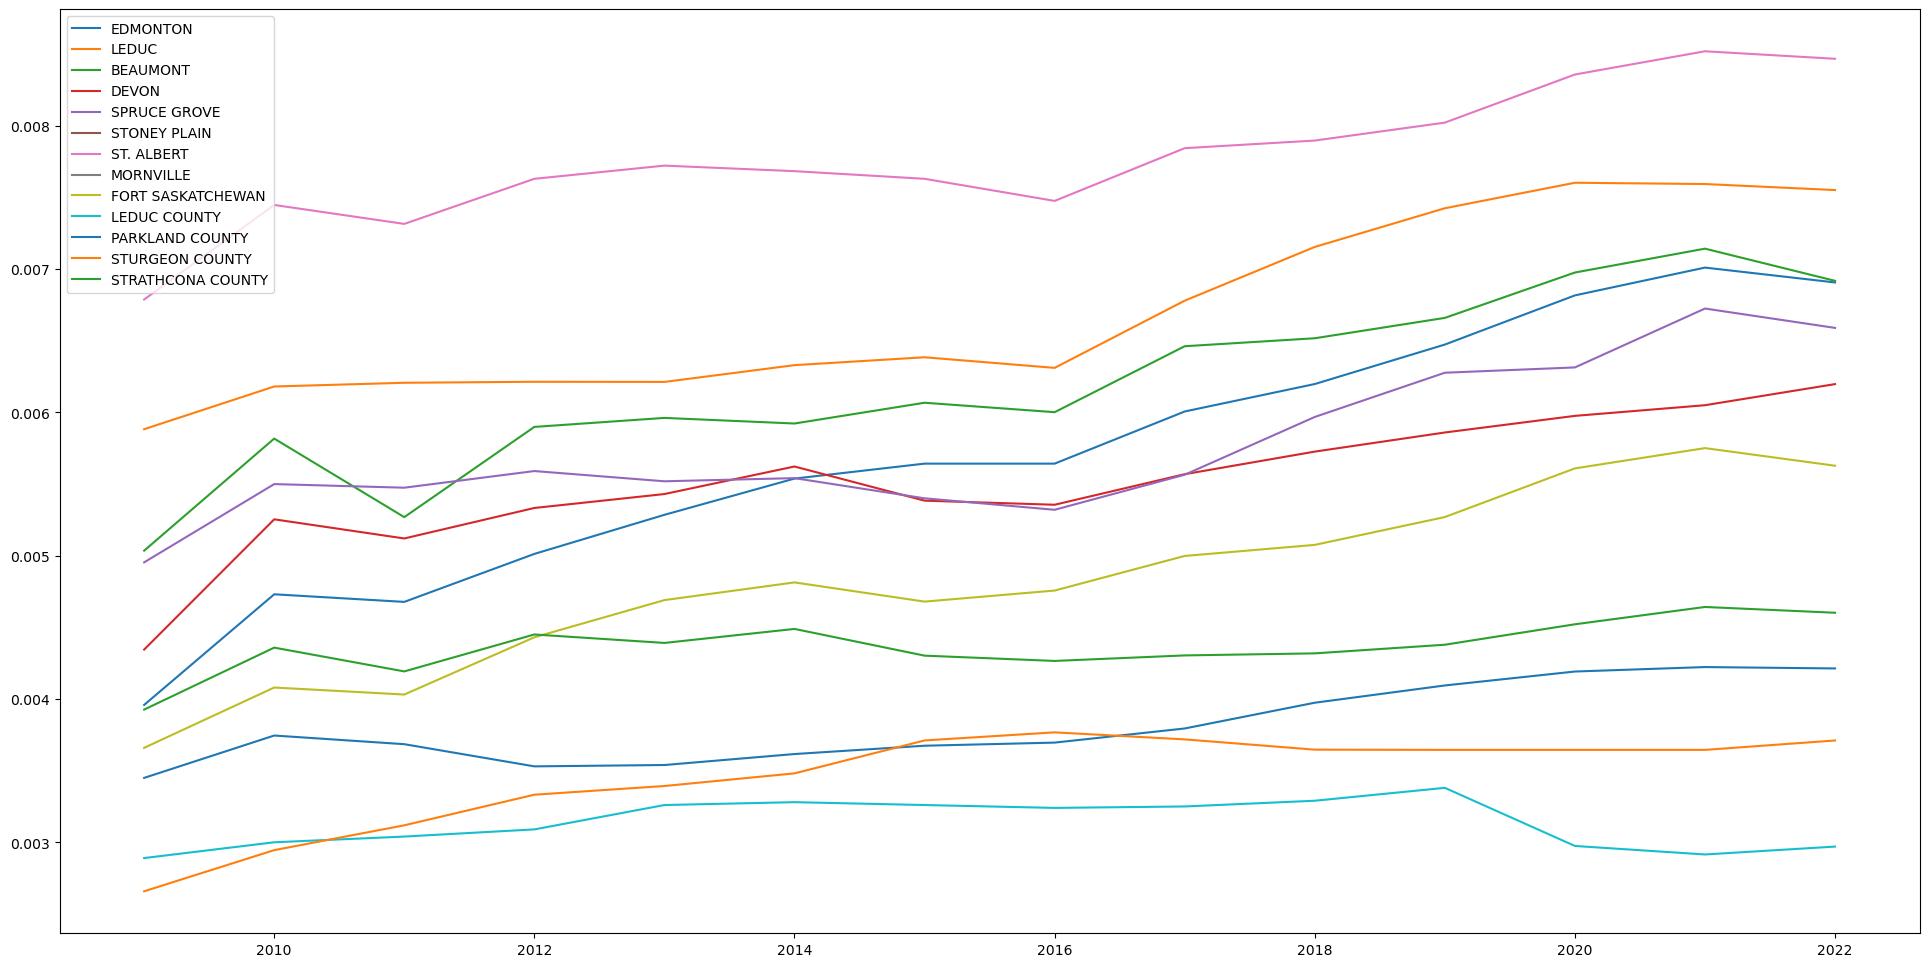

In [19]:
data = ab_res_ptax09_21[ab_res_ptax09_21['MUNICIPALITY'].isin(edmonton_metro)]

plt.figure(figsize=(24,12))
for city in edmonton_metro:
    plt.plot(data[data['MUNICIPALITY'] == city]['YEAR'], data[data['MUNICIPALITY'] == city]['General Municipal Tax Rate'], label=city)
plt.legend()
plt.show()

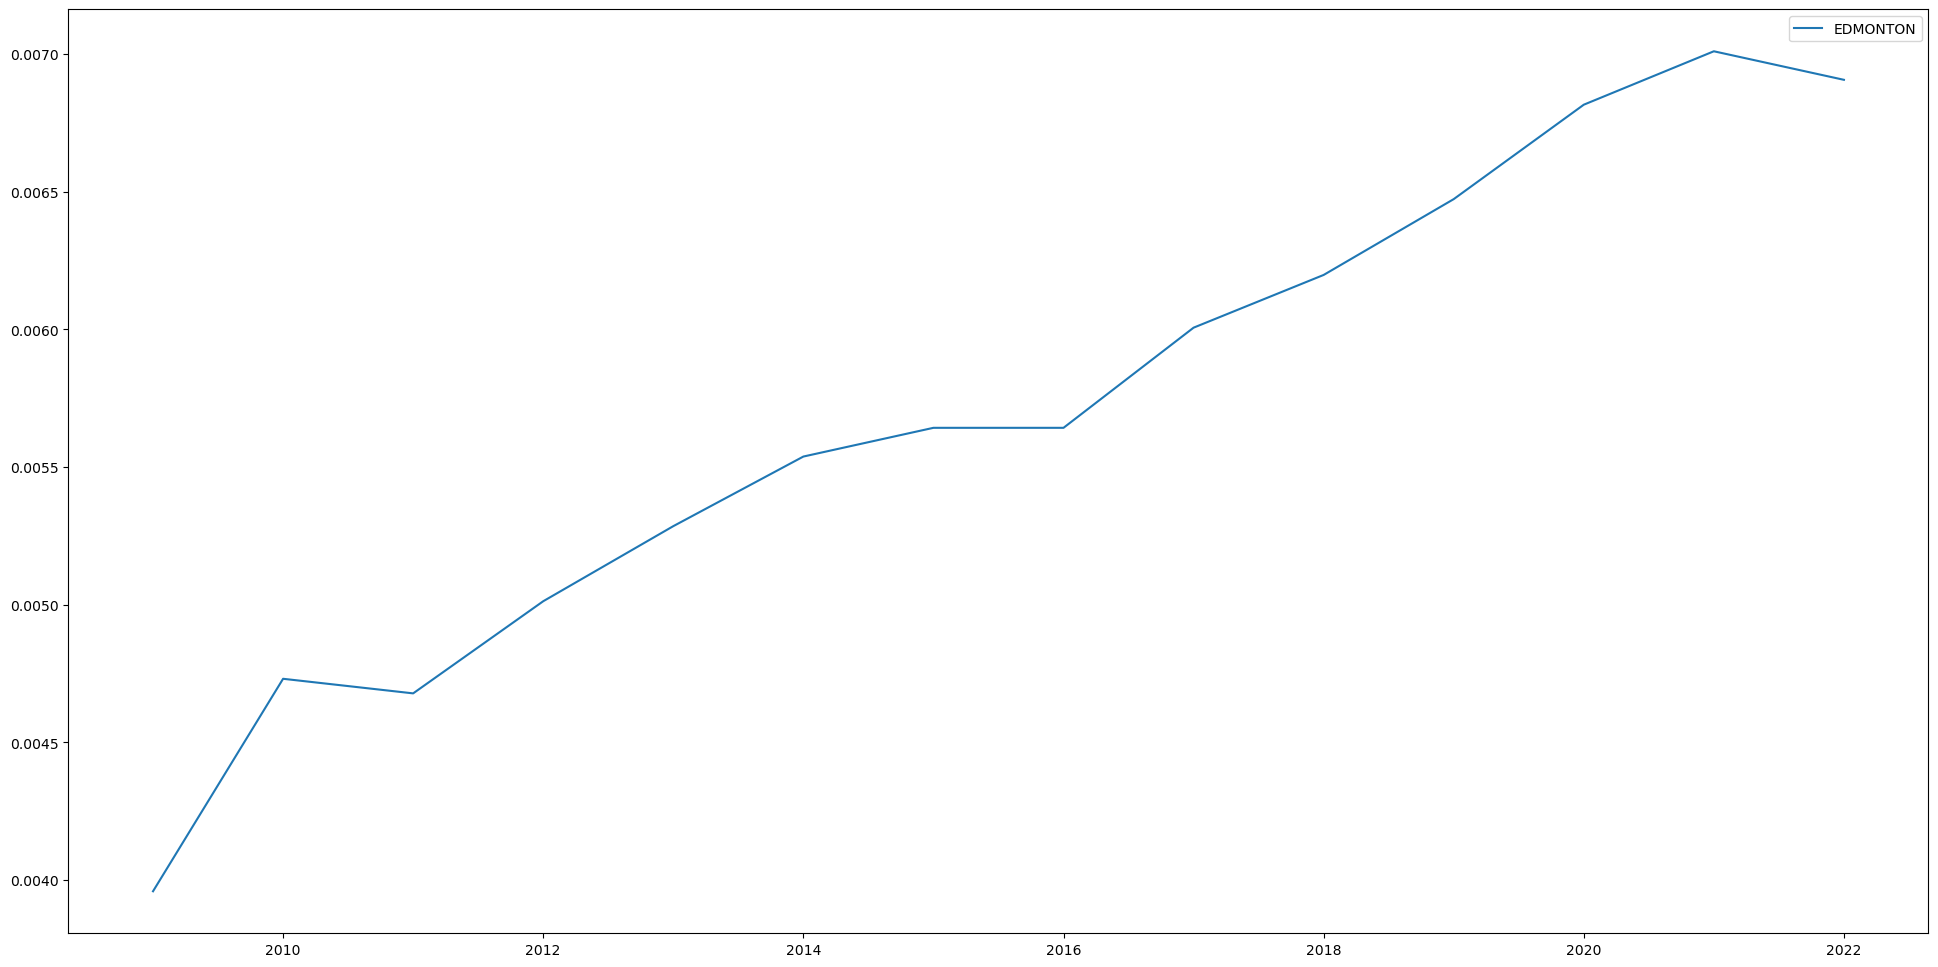

In [20]:
data = ab_res_ptax09_21[ab_res_ptax09_21['MUNICIPALITY'].isin(edmonton_metro)]

plt.figure(figsize=(24,12))
plt.plot(data[data['MUNICIPALITY'] == 'EDMONTON']['YEAR'], data[data['MUNICIPALITY'] == 'EDMONTON']['General Municipal Tax Rate'], label='EDMONTON')
plt.legend()
plt.show()

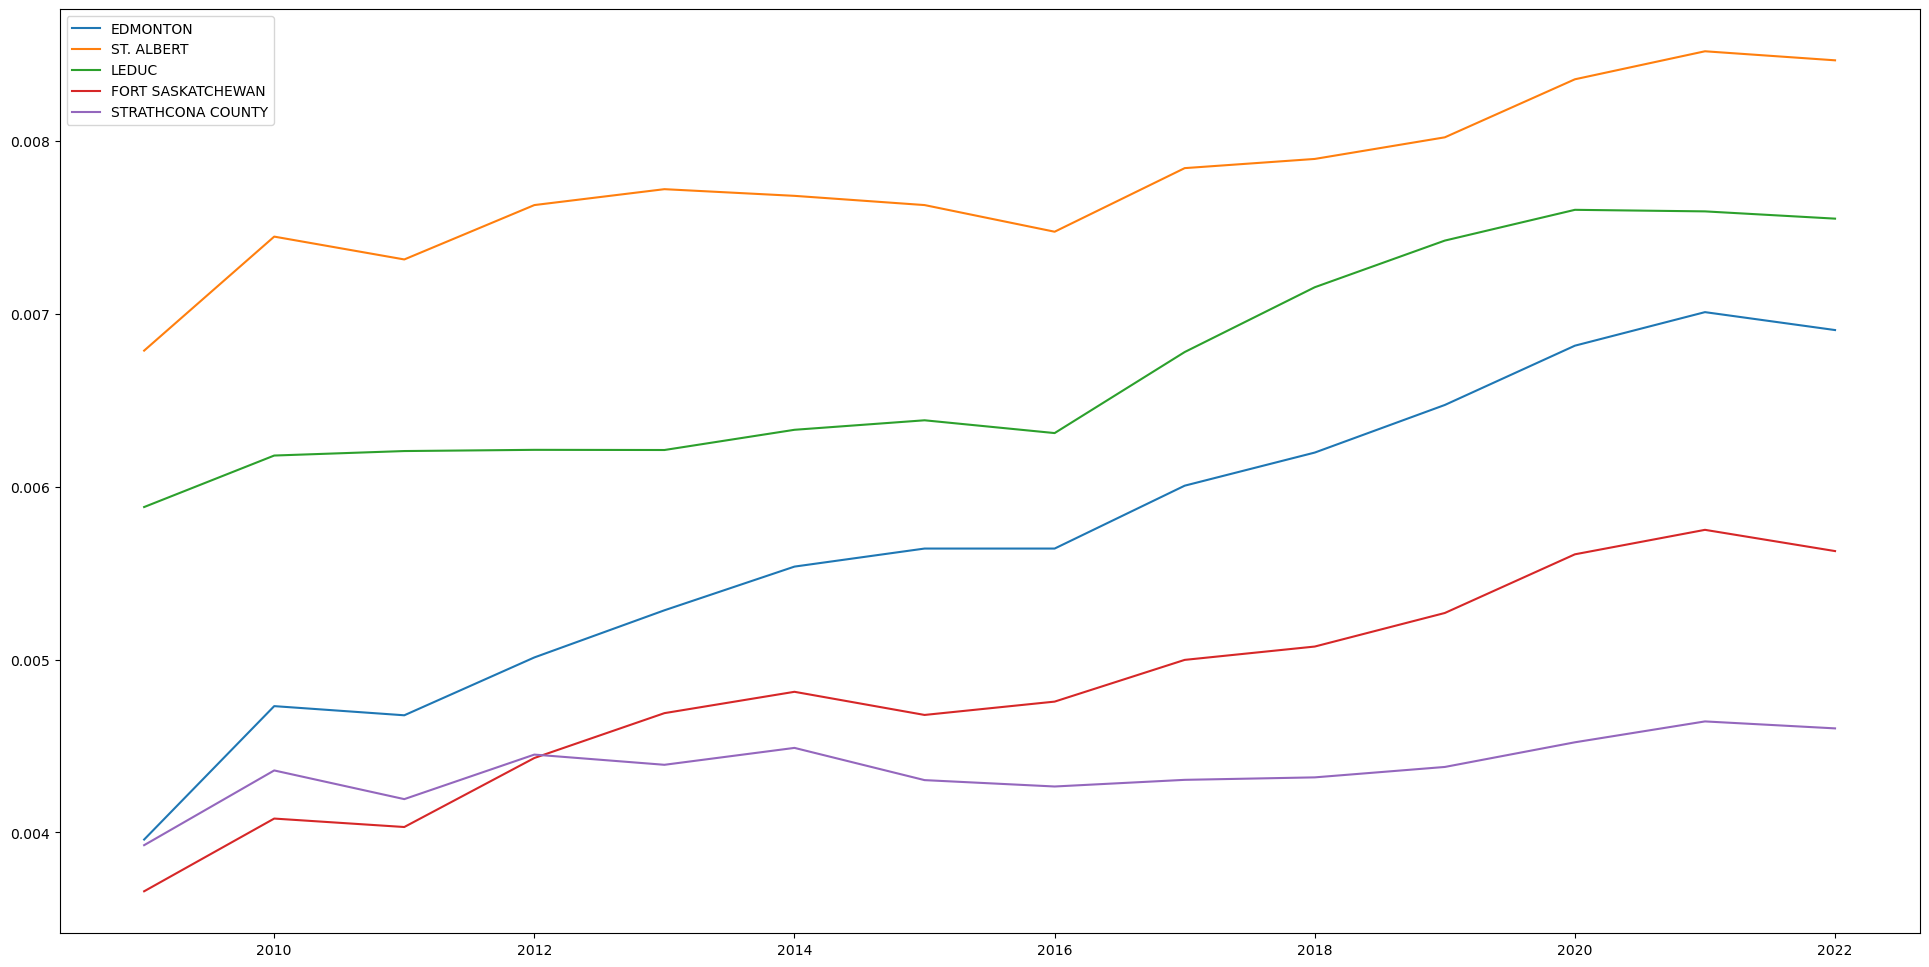

In [21]:
cities = ['EDMONTON', 'ST. ALBERT', 'LEDUC', 'FORT SASKATCHEWAN', 'STRATHCONA COUNTY']
data = ab_res_ptax09_21[ab_res_ptax09_21['MUNICIPALITY'].isin(cities)]

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['MUNICIPALITY'] == city]['YEAR'], data[data['MUNICIPALITY'] == city]['General Municipal Tax Rate'], label=city)
plt.legend()
plt.show()

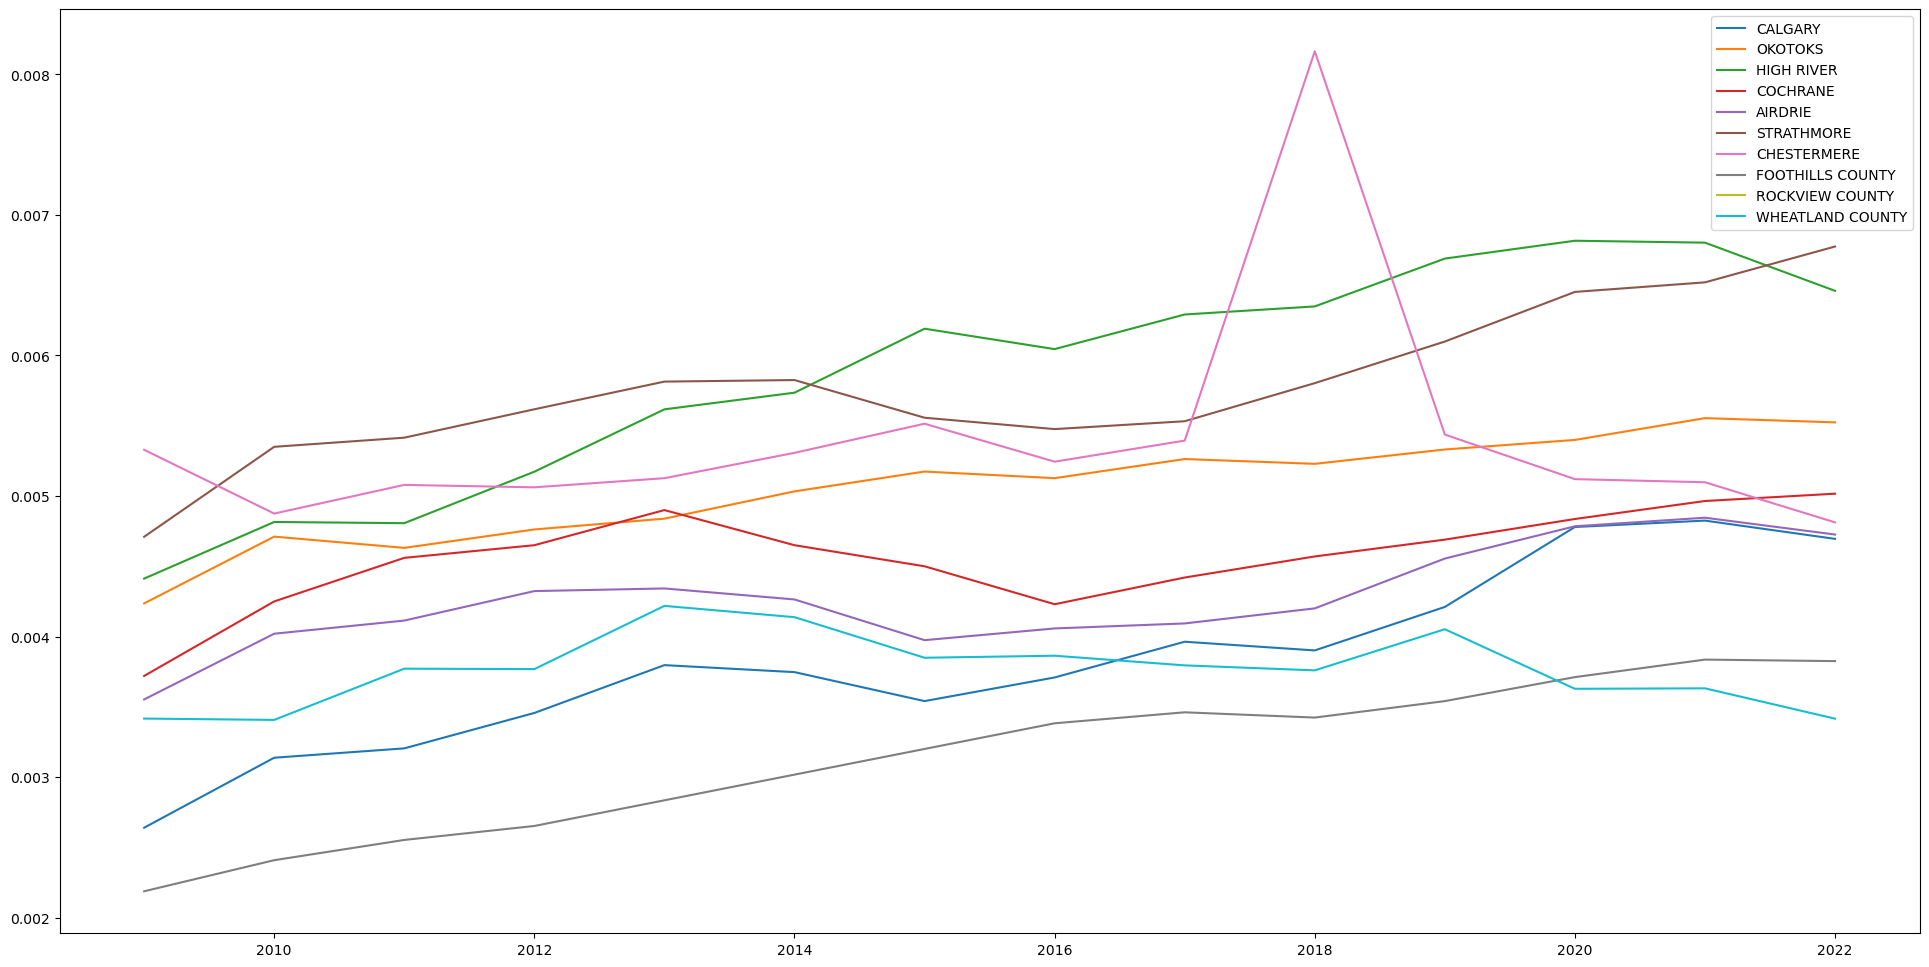

In [22]:
data = ab_res_ptax09_21[ab_res_ptax09_21['MUNICIPALITY'].isin(calgary_metro)]

plt.figure(figsize=(24,12))
for city in calgary_metro:
    plt.plot(data[data['MUNICIPALITY'] == city]['YEAR'], data[data['MUNICIPALITY'] == city]['General Municipal Tax Rate'], label=city)
plt.legend()
plt.show()

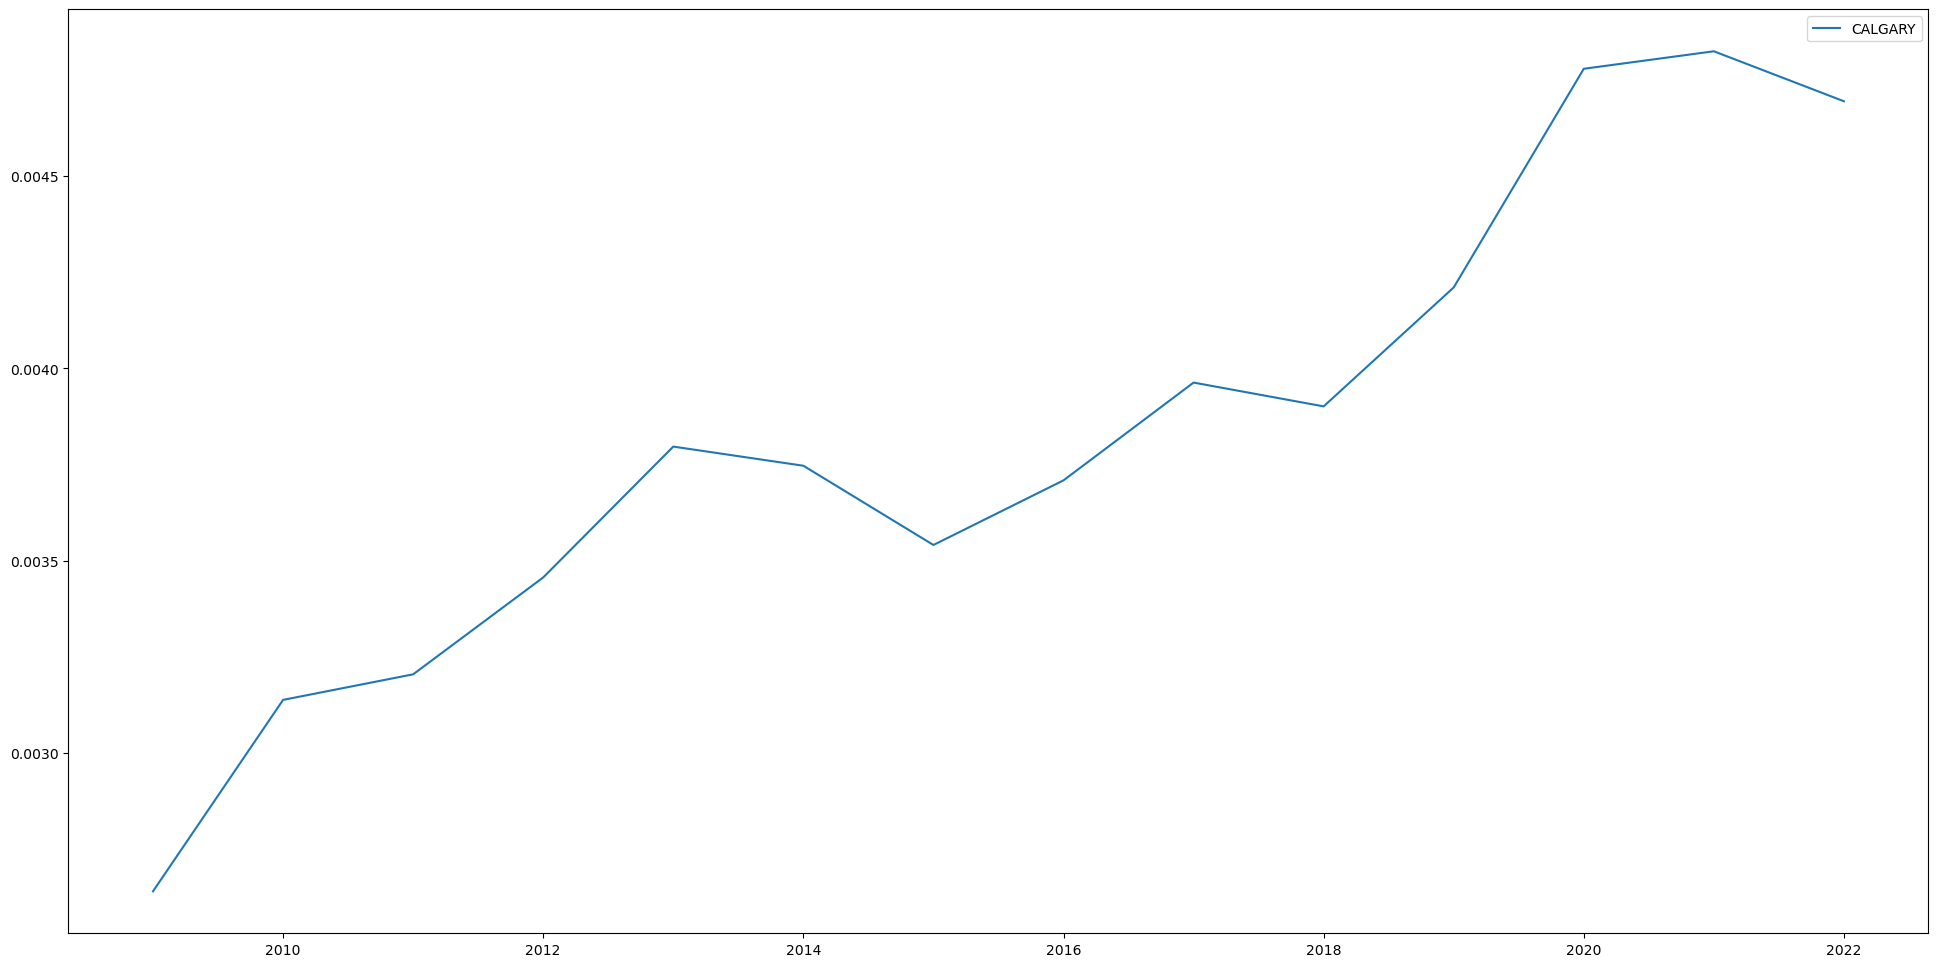

In [23]:
data = ab_res_ptax09_21[ab_res_ptax09_21['MUNICIPALITY'].isin(calgary_metro)]

plt.figure(figsize=(24,12))
plt.plot(data[data['MUNICIPALITY'] == 'CALGARY']['YEAR'], data[data['MUNICIPALITY'] == 'CALGARY']['General Municipal Tax Rate'], label='CALGARY')
plt.legend()
plt.show()

In [24]:
calgary_metro

['CALGARY',
 'OKOTOKS',
 'HIGH RIVER',
 'COCHRANE',
 'AIRDRIE',
 'STRATHMORE',
 'CHESTERMERE',
 'FOOTHILLS COUNTY',
 'ROCKVIEW COUNTY',
 'WHEATLAND COUNTY']

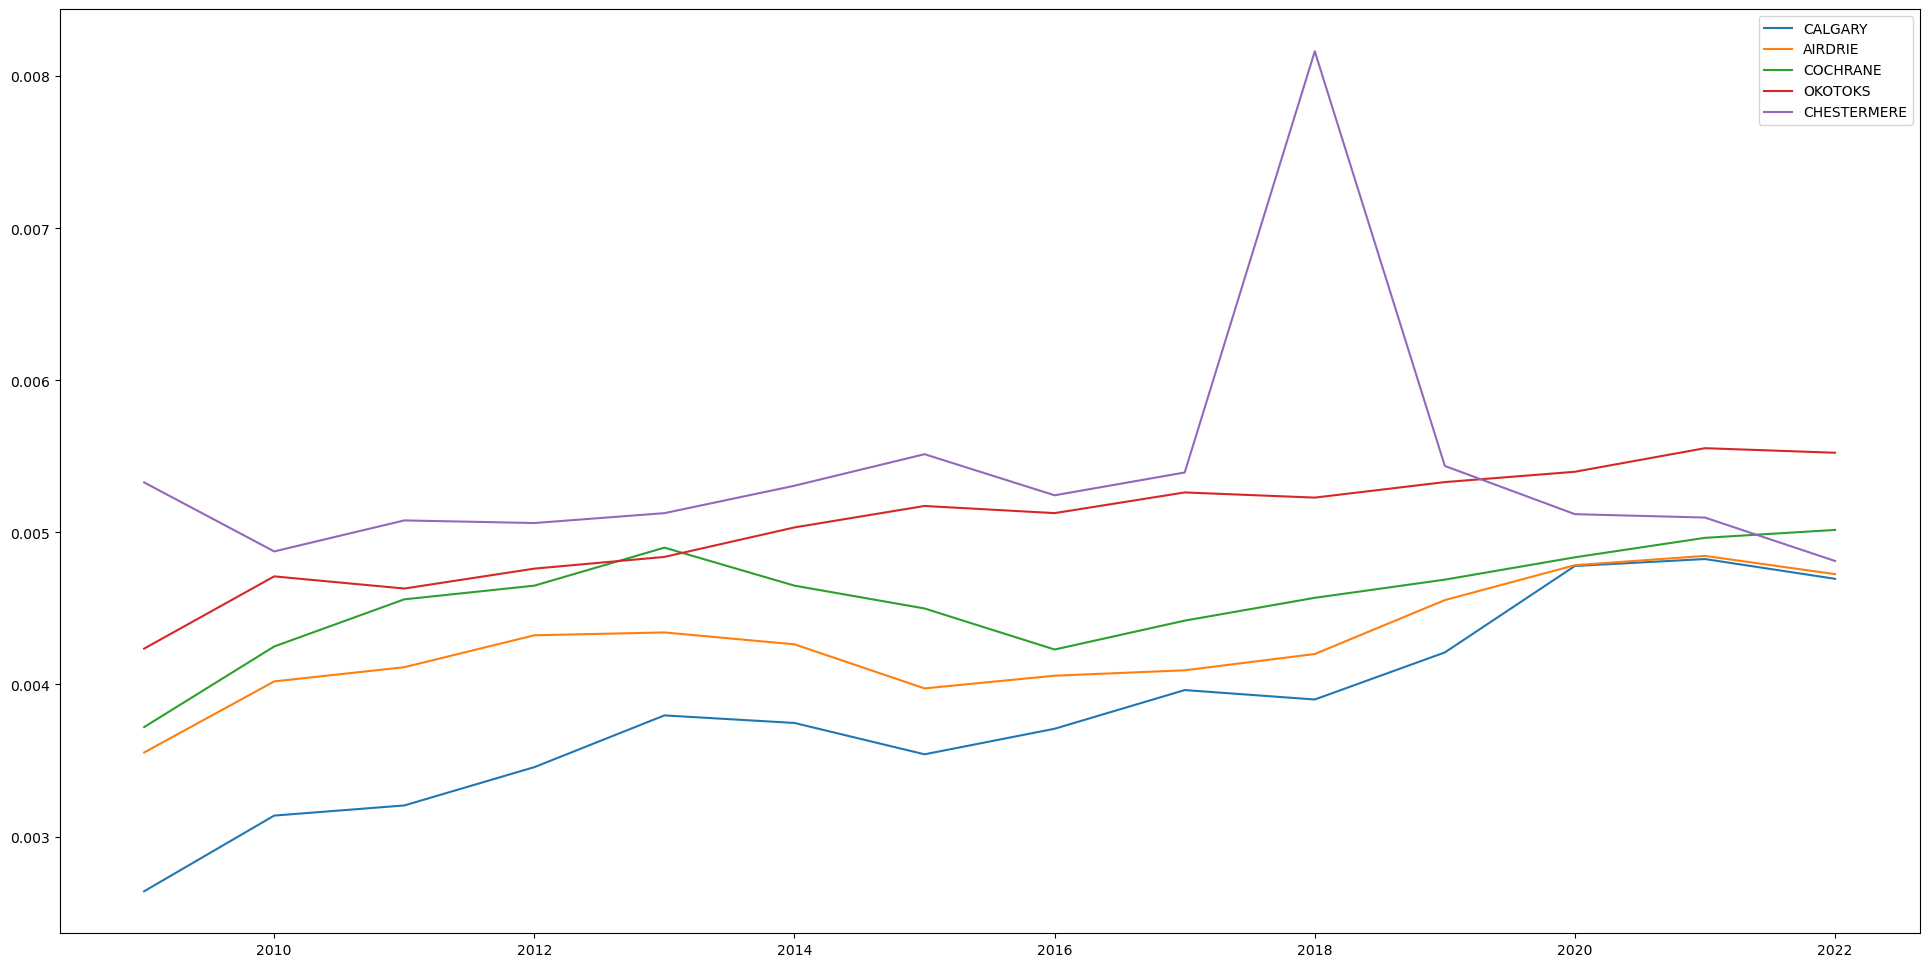

In [25]:
cities = ['CALGARY', 'AIRDRIE', 'COCHRANE', 'OKOTOKS', 'CHESTERMERE']
data = ab_res_ptax09_21[ab_res_ptax09_21['MUNICIPALITY'].isin(cities)]

plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['MUNICIPALITY'] == city]['YEAR'], data[data['MUNICIPALITY'] == city]['General Municipal Tax Rate'], label=city)
plt.legend()
plt.show()